# Analysis
## Identifying the best:

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
df2 = pd.read_csv("output-results-exp3-detr101.csv")

In [8]:
df2[df2["Matching Function"] == "mix"].sort_values(
    by=["Localization Set Size (Mean)", "Classification Set Size (Mean)"]
).iloc[:15]

,Confidence Set Size (Mean),Confidence Risk (Mean),Localization Set Size (Mean),Localization Risk (Mean),Classification Set Size (Mean),Classification Risk (Mean),Global Risk (Mean),Confidence Alpha,Localization Alpha,Classification Alpha,Global Alpha,Matching Function,Confidence Method,Localization Method,Classification Prediction Set,Localization Prediction Set
97,22.6572,0.026800,1.017858,0.097714,0.931302,0.087753,0.152417,0.03,0.10,0.10,0.2,mix,box_count_threshold,pixelwise,lac,multiplicative
99,22.6572,0.026800,1.017858,0.097714,0.993600,0.081288,0.149177,0.03,0.10,0.10,0.2,mix,box_count_threshold,pixelwise,aps,multiplicative
96,22.6572,0.026800,1.029975,0.098065,0.931302,0.087753,0.152229,0.03,0.10,0.10,0.2,mix,box_count_threshold,pixelwise,lac,additive
98,22.6572,0.026800,1.029975,0.098065,0.993600,0.081288,0.148960,0.03,0.10,0.10,0.2,mix,box_count_threshold,pixelwise,aps,additive
109,14.0464,0.026428,1.065515,0.096690,1.064004,0.091765,0.153795,0.03,0.10,0.10,0.2,mix,box_count_recall,pixelwise,lac,multiplicative
111,14.0464,0.026428,1.065515,0.096690,1.078674,0.091774,0.153824,0.03,0.10,0.10,0.2,mix,box_count_recall,pixelwise,aps,multiplicative
108,14.0464,0.026428,1.084246,0.095050,1.064004,0.091765,0.150816,0.03,0.10,0.10,0.2,mix,box_count_recall,pixelwise,lac,additive
110,14.0464,0.026428,1.084246,0.095050,1.078674,0.091774,0.150839,0.03,0.10,0.10,0.2,mix,box_count_recall,pixelwise,aps,additive
5,25.5884,0.022000,1.333746,0.047382,8.227984,0.046413,0.083472,0.02,0.05,0.05,0.1,mix,box_count_threshold,pixelwise,lac,multiplicative
7,25.5884,0.022000,1.333746,0.047382,11.117096,0.045862,0.083537,0.02,0.05,0.05,0.1,mix,box_count_threshold,pixelwise,aps,multiplicative


### Best overall ($\alpha = 0.2$)

In [9]:
row2 = (
    df2[df2["Matching Function"] == "mix"]
    .sort_values(by=["Localization Set Size (Mean)", "Classification Set Size (Mean)"])
    .iloc[0]
)
row2

Confidence Set Size (Mean)                    22.6572
Confidence Risk (Mean)                         0.0268
Localization Set Size (Mean)                 1.017858
Localization Risk (Mean)                     0.097714
Classification Set Size (Mean)               0.931302
Classification Risk (Mean)                   0.087753
Global Risk (Mean)                           0.152417
Confidence Alpha                                 0.03
Localization Alpha                                0.1
Classification Alpha                              0.1
Global Alpha                                      0.2
Matching Function                                 mix
Confidence Method                 box_count_threshold
Localization Method                         pixelwise
Classification Prediction Set                     lac
Localization Prediction Set            multiplicative
Name: 97, dtype: object

### Best for $\alpha = 0.1$

In [10]:
first_filter = df2[df2["Matching Function"] == "mix"]
second_filter = first_filter[first_filter["Localization Alpha"] == 0.05]
row = second_filter.sort_values(
    by=["Localization Set Size (Mean)", "Classification Set Size (Mean)"]
).iloc[0]
row

Confidence Set Size (Mean)                    25.5884
Confidence Risk (Mean)                          0.022
Localization Set Size (Mean)                 1.333746
Localization Risk (Mean)                     0.047382
Classification Set Size (Mean)               8.227984
Classification Risk (Mean)                   0.046413
Global Risk (Mean)                           0.083472
Confidence Alpha                                 0.02
Localization Alpha                               0.05
Classification Alpha                             0.05
Global Alpha                                      0.1
Matching Function                                 mix
Confidence Method                 box_count_threshold
Localization Method                         pixelwise
Classification Prediction Set                     lac
Localization Prediction Set            multiplicative
Name: 5, dtype: object

### (It's the same for both)

# Tables & Figures

In [11]:
df2_alpha1 = df2[df2["Localization Alpha"] == 0.05].copy()
df2_alpha2 = df2[df2["Localization Alpha"] == 0.1].copy()

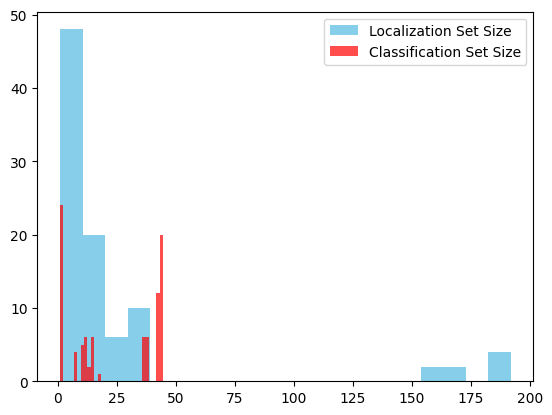

In [12]:
plt.hist(
    df2_alpha1["Localization Set Size (Mean)"],
    bins=20,
    color="skyblue",
    label="Localization Set Size",
)
plt.hist(
    df2_alpha1["Classification Set Size (Mean)"],
    bins=30,
    color="red",
    alpha=0.7,
    label="Classification Set Size",
)
plt.legend();

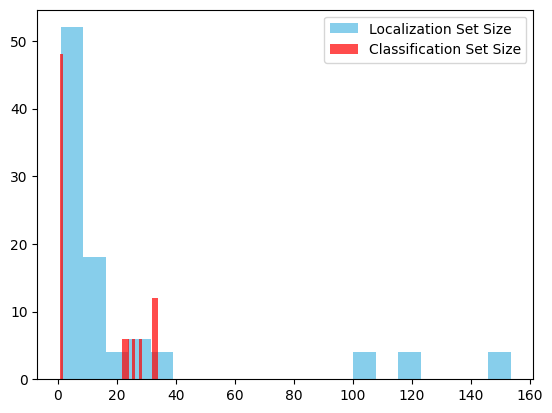

In [13]:
plt.hist(
    df2_alpha2["Localization Set Size (Mean)"],
    bins=20,
    color="skyblue",
    label="Localization Set Size",
)
plt.hist(
    df2_alpha2["Classification Set Size (Mean)"],
    bins=30,
    color="red",
    alpha=0.7,
    label="Classification Set Size",
)
plt.legend();

## For each loss, print the best

In [14]:
list_columns = [
    # "Global Alpha",
    # "Matching Function",
    "Confidence Method",
    "Localization Method",
    "Classification Prediction Set",
    "Localization Prediction Set",
]

for col in list_columns:
    print(f"{col}")
    for value in df2_alpha1[col].unique():
        task = col.split(" ")[0]
        set_size = f"{task} Set Size (Mean)"
        risk = f"{task} Risk (Mean)"
        row = df2_alpha1[df2[col] == value].sort_values(by=set_size).iloc[0]
        print(f"\t {value}:")
        print(f"\t\t Set Size: {row[set_size]}")
        print(f"\t\t Risk: {row[risk]}")
        print(f"\t\t Global Risk: {row['Global Risk (Mean)']}")

Confidence Method
	 box_count_threshold:
		 Set Size: 25.58839988708496
		 Risk: 0.0219999998807907
		 Global Risk: 0.0857814848423004
	 box_count_recall:
		 Set Size: 17.777999877929688
		 Risk: 0.0185156762599945
		 Global Risk: 0.0847322717308998
Localization Method
	 thresholded:
		 Set Size: 1.552154302597046
		 Risk: 0.0456000007688999
		 Global Risk: 0.0971129015088081
	 pixelwise:
		 Set Size: 1.0425351858139038
		 Risk: 0.0466011054813861
		 Global Risk: 0.0955988988280296
	 boxwise:
		 Set Size: 1.5036191940307615
		 Risk: 0.0490064993500709
		 Global Risk: 0.0970770493149757
Classification Prediction Set
	 lac:
		 Set Size: 0.9938870072364808
		 Risk: 0.0508200973272323
		 Global Risk: 0.0874383449554443
	 aps:
		 Set Size: 1.006611943244934
		 Risk: 0.050472691655159
		 Global Risk: 0.0816340968012809
Localization Prediction Set
	 additive:
		 Set Size: 1.0469754934310913
		 Risk: 0.0519743636250495
		 Global Risk: 0.0999723300337791
	 multiplicative:
		 Set Size: 1.0425351

/var/folders/g7/bnv7sj75399d5qdncpcwkjzh0000gn/T/ipykernel_60839/1193675702.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df2_alpha1[df2[col] == value].sort_values(by=set_size).iloc[0]
/var/folders/g7/bnv7sj75399d5qdncpcwkjzh0000gn/T/ipykernel_60839/1193675702.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df2_alpha1[df2[col] == value].sort_values(by=set_size).iloc[0]
/var/folders/g7/bnv7sj75399d5qdncpcwkjzh0000gn/T/ipykernel_60839/1193675702.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df2_alpha1[df2[col] == value].sort_values(by=set_size).iloc[0]
/var/folders/g7/bnv7sj75399d5qdncpcwkjzh0000gn/T/ipykernel_60839/1193675702.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = df2_alpha1[df2[col] == value].sort_values(by=set_size).iloc[0]
/var/folders/g7/bnv7sj75399d5qdncpcwkjzh0000gn/T/ipykernel_60839/1193675702.py:1

## Comparison of alpha & matching

In [15]:
### IT Was better with $\t=0.25$

In [16]:
for matching in df2_alpha1["Matching Function"].unique():
    print(f"{matching}")
    task = col.split(" ")[0]
    conf_set_size = f"Confidence Set Size (Mean)"
    loc_set_size = f"Localization Set Size (Mean)"
    cls_set_size = f"Classification Set Size (Mean)"
    row1 = (
        df2_alpha1[df2_alpha1["Matching Function"] == matching]
        .sort_values(
            by=[
                "Localization Set Size (Mean)",
                "Classification Set Size (Mean)",
            ]
        )
        .iloc[0]
    )
    row2 = (
        df2_alpha2[df2_alpha2["Matching Function"] == matching]
        .sort_values(
            by=[
                "Localization Set Size (Mean)",
                "Classification Set Size (Mean)",
            ]
        )
        .iloc[0]
    )
    print(row2["Confidence Method"])
    print(f"\t Global alpha=0.1:")
    print(f"\t\t Confidence Set Size: {row1[conf_set_size]}")
    print(f"\t\t Localization Set Size: {row1[loc_set_size]}")
    print(f"\t\t Classification Set Size: {row1[cls_set_size]}")
    print(f"\t\t Global Risk: {row1['Global Risk (Mean)']}")
    print(f"\t Global alpha=0.2:")
    print(f"\t\t Confidence Set Size: {row2[conf_set_size]}")
    print(f"\t\t Localization Set Size: {row2[loc_set_size]}")
    print(f"\t\t Classification Set Size: {row2[cls_set_size]}")
    print(f"\t\t Global Risk: {row2['Global Risk (Mean)']}")

mix
box_count_threshold
	 Global alpha=0.1:
		 Confidence Set Size: 25.58839988708496
		 Localization Set Size: 1.333746075630188
		 Classification Set Size: 8.227984428405762
		 Global Risk: 0.0834720209240913
	 Global alpha=0.2:
		 Confidence Set Size: 22.65719985961914
		 Localization Set Size: 1.017857789993286
		 Classification Set Size: 0.9313015341758728
		 Global Risk: 0.1524171680212021
hausdorff
box_count_recall
	 Global alpha=0.1:
		 Confidence Set Size: 25.58839988708496
		 Localization Set Size: 1.0425351858139038
		 Classification Set Size: 41.84601211547851
		 Global Risk: 0.0955988988280296
	 Global alpha=0.2:
		 Confidence Set Size: 14.04640007019043
		 Localization Set Size: 0.9989542961120604
		 Classification Set Size: 22.0349063873291
		 Global Risk: 0.1676755547523498
lac
box_count_threshold
	 Global alpha=0.1:
		 Confidence Set Size: 25.58839988708496
		 Localization Set Size: 14.147027969360352
		 Classification Set Size: 0.9938870072364808
		 Global Risk: 0.089

In [25]:
for matching in df2_alpha1["Matching Function"].unique():
    print(f"{matching}")
    task = col.split(" ")[0]
    conf_set_size = f"Confidence Set Size (Mean)"
    loc_set_size = f"Localization Set Size (Mean)"
    cls_set_size = f"Classification Set Size (Mean)"
    row1 = (
        df2_alpha1[df2_alpha1["Matching Function"] == matching]
        .sort_values(
            by=[
                "Classification Set Size (Mean)",
                "Localization Set Size (Mean)",
            ]
        )
        .iloc[0]
    )
    row2 = (
        df2_alpha2[df2_alpha2["Matching Function"] == matching]
        .sort_values(
            by=[
                "Classification Set Size (Mean)",
                "Localization Set Size (Mean)",
            ]
        )
        .iloc[0]
    )
    print(row2["Confidence Method"])
    print(f"\t Global alpha=0.1:")
    print(f"\t\t Confidence Set Size: {row1[conf_set_size]}")
    print(f"\t\t Localization Set Size: {row1[loc_set_size]}")
    print(f"\t\t Classification Set Size: {row1[cls_set_size]}")
    print(f"\t\t Global Risk: {row1['Global Risk (Mean)']}")
    print(f"\t Global alpha=0.2:")
    print(f"\t\t Confidence Set Size: {row2[conf_set_size]}")
    print(f"\t\t Localization Set Size: {row2[loc_set_size]}")
    print(f"\t\t Classification Set Size: {row2[cls_set_size]}")
    print(f"\t\t Global Risk: {row2['Global Risk (Mean)']}")

mix
box_count_threshold
	 Global alpha=0.1:
		 Confidence Set Size: 25.58839988708496
		 Localization Set Size: 1.333746075630188
		 Classification Set Size: 8.227984428405762
		 Global Risk: 0.0834720209240913
	 Global alpha=0.2:
		 Confidence Set Size: 22.65719985961914
		 Localization Set Size: 1.017857789993286
		 Classification Set Size: 0.9313015341758728
		 Global Risk: 0.1524171680212021
hausdorff
box_count_recall
	 Global alpha=0.1:
		 Confidence Set Size: 17.777999877929688
		 Localization Set Size: 1.113991379737854
		 Classification Set Size: 37.15983200073242
		 Global Risk: 0.0982298552989959
	 Global alpha=0.2:
		 Confidence Set Size: 14.04640007019043
		 Localization Set Size: 0.9989542961120604
		 Classification Set Size: 22.0349063873291
		 Global Risk: 0.1676755547523498
lac
box_count_threshold
	 Global alpha=0.1:
		 Confidence Set Size: 25.58839988708496
		 Localization Set Size: 14.147027969360352
		 Classification Set Size: 0.9938870072364808
		 Global Risk: 0.089

In [17]:
df2.columns

Index(['Confidence Set Size (Mean)', 'Confidence Risk (Mean)',
       'Localization Set Size (Mean)', 'Localization Risk (Mean)',
       'Classification Set Size (Mean)', 'Classification Risk (Mean)',
       'Global Risk (Mean)', 'Confidence Alpha', 'Localization Alpha',
       'Classification Alpha', 'Global Alpha', 'Matching Function',
       'Confidence Method', 'Localization Method',
       'Classification Prediction Set', 'Localization Prediction Set'],
      dtype='object')

## Comparison with YOLO

In [18]:
df_yolo2 = pd.read_csv("output-results-exp1-yolo.csv")

df_yolo2_alpha1 = df_yolo2[df_yolo2["Localization Alpha"] == 0.05].copy()
df_yolo2_alpha2 = df_yolo2[df_yolo2["Localization Alpha"] == 0.1].copy()

In [19]:
len(df_yolo2)

188

In [20]:
df_yolo2.to_csv("output-yolo.csv", index=False)

## Same performance table as DETR

In [21]:
list_columns = [
    # "Global Alpha",
    # "Matching Function",
    "Confidence Method",
    "Localization Method",
    "Classification Prediction Set",
    "Localization Prediction Set",
]

for col in list_columns:
    print(f"{col}")
    for value in df_yolo2_alpha1[col].unique():
        task = col.split(" ")[0]
        set_size = f"{task} Set Size (Mean)"
        risk = f"{task} Risk (Mean)"
        row = df_yolo2_alpha1[df_yolo2_alpha1[col] == value].sort_values(by=set_size).iloc[0]
        print(f"\t {value}:")
        print(f"\t\t Set Size: {row[set_size]}")
        print(f"\t\t Risk: {row[risk]}")
        print(f"\t\t Global Risk: {row['Global Risk (Mean)']}")

Confidence Method
	 box_count_threshold:
		 Set Size: 18.855199813842773
		 Risk: 0.0124000003561377
		 Global Risk: 0.0942870751023292
	 box_count_recall:
		 Set Size: 11.710399627685549
		 Risk: 0.0189005509018898
		 Global Risk: 0.0935816764831543
Localization Method
	 thresholded:
		 Set Size: 5.451345443725586
		 Risk: 0.046799998730421
		 Global Risk: 0.0957240164279937
	 pixelwise:
		 Set Size: 3.866952419281006
		 Risk: 0.048709213733673
		 Global Risk: 0.0935064852237701
	 boxwise:
		 Set Size: 5.225225925445557
		 Risk: 0.0457415245473384
		 Global Risk: 0.0918136686086654
Classification Prediction Set
	 lac:
		 Set Size: 0.7168436050415039
		 Risk: 0.0489072427153587
		 Global Risk: 0.0853283479809761
	 aps:
		 Set Size: 0.9959999918937684
		 Risk: 0.0428455658257007
		 Global Risk: 0.0796808749437332
Localization Prediction Set
	 additive:
		 Set Size: 3.866952419281006
		 Risk: 0.048709213733673
		 Global Risk: 0.0813967287540435
	 multiplicative:
		 Set Size: 4.1814494132

## Compare metrics (number of ground truths and predictions for each model)

### Maybe not, just FYI drop quantiles of number of ground truths

In [22]:
# import numpy as np

# nb_gt = [len(x) for x in preds_val.true_boxes]

# mean_nb_gt = np.mean(nb_gt)
# median_nb_gt = np.median(nb_gt)
# quantiles_nb_gt = {
#     "95%": np.percentile(nb_gt, 95, interpolation="nearest"),
#     "97%": np.percentile(nb_gt, 97, interpolation="nearest"),
#     "98%": np.percentile(nb_gt, 98, interpolation="nearest"),
# }

# print(f"Mean: {mean_nb_gt}")
# print(f"Median: {median_nb_gt}")
# print(f"Quantiles: {quantiles_nb_gt}")

## Compare performance with DETR $\alpha=0.2$

In [23]:
list_columns = [
    # "Global Alpha",
    # "Matching Function",
    "Confidence Method",
    "Localization Method",
    "Classification Prediction Set",
    "Localization Prediction Set",
]

for col in list_columns:
    print(f"{col}")
    for value in df_yolo2_alpha1[col].unique():
        task = col.split(" ")[0]
        set_size = f"{task} Set Size (Mean)"
        risk = f"{task} Risk (Mean)"
        row_detr = df2_alpha2[df2_alpha2[col] == value].sort_values(by=set_size).iloc[0]
        row_yolo = df_yolo2_alpha2[df_yolo2_alpha2[col] == value].sort_values(by=set_size).iloc[0]
        print(f"\t {value}: DETR vs YOLO")
        print(f"\t\t Set Size: {row_detr[set_size]} vs {row_yolo[set_size]}")
        print(f"\t\t Risk: {row_detr[risk]} vs {row_yolo[risk]}")
        print(
            f"\t\t Global Risk: {row_detr['Global Risk (Mean)']} vs {row_yolo['Global Risk (Mean)']}"
        )

Confidence Method
	 box_count_threshold: DETR vs YOLO
		 Set Size: 22.65719985961914 vs 15.762399673461914
		 Risk: 0.0267999991774559 vs 0.0211999993771314
		 Global Risk: 0.1662532091140747 vs 0.1811055243015289
	 box_count_recall: DETR vs YOLO
		 Set Size: 14.04640007019043 vs 10.15839958190918
		 Risk: 0.0264284908771514 vs 0.0313073620200157
		 Global Risk: 0.1674631685018539 vs 0.1754245609045028
Localization Method
	 thresholded: DETR vs YOLO
		 Set Size: 1.3817249536514282 vs 4.7828168869018555
		 Risk: 0.1111999973654747 vs 0.089599996805191
		 Global Risk: 0.2023019939661026 vs 0.1754245609045028
	 pixelwise: DETR vs YOLO
		 Set Size: 0.9989542961120604 vs 2.526918411254883
		 Risk: 0.0913755521178245 vs 0.1009332984685897
		 Global Risk: 0.1689547449350357 vs 0.182404488325119
	 boxwise: DETR vs YOLO
		 Set Size: 1.284693717956543 vs 3.839477062225342
		 Risk: 0.1013698950409889 vs 0.0988379120826721
		 Global Risk: 0.1821683496236801 vs 0.1824665814638137
Classification Pre

## $\alpha=0.1$

In [24]:
list_columns = [
    # "Global Alpha",
    # "Matching Function",
    "Confidence Method",
    "Localization Method",
    "Classification Prediction Set",
    "Localization Prediction Set",
]

for col in list_columns:
    print(f"{col}")
    for value in df_yolo2_alpha1[col].unique():
        task = col.split(" ")[0]
        set_size = f"{task} Set Size (Mean)"
        risk = f"{task} Risk (Mean)"
        row_detr = df2_alpha1[df2_alpha1[col] == value].sort_values(by=set_size).iloc[0]
        row_yolo = df_yolo2_alpha1[df_yolo2_alpha1[col] == value].sort_values(by=set_size).iloc[0]
        print(f"\t {value}: DETR vs YOLO")
        print(f"\t\t Set Size: {row_detr[set_size]} vs {row_yolo[set_size]}")
        print(f"\t\t Risk: {row_detr[risk]} vs {row_yolo[risk]}")
        print(
            f"\t\t Global Risk: {row_detr['Global Risk (Mean)']} vs {row_yolo['Global Risk (Mean)']}"
        )

Confidence Method
	 box_count_threshold: DETR vs YOLO
		 Set Size: 25.58839988708496 vs 18.855199813842773
		 Risk: 0.0219999998807907 vs 0.0124000003561377
		 Global Risk: 0.0857814848423004 vs 0.0942870751023292
	 box_count_recall: DETR vs YOLO
		 Set Size: 17.777999877929688 vs 11.710399627685549
		 Risk: 0.0185156762599945 vs 0.0189005509018898
		 Global Risk: 0.0847322717308998 vs 0.0935816764831543
Localization Method
	 thresholded: DETR vs YOLO
		 Set Size: 1.552154302597046 vs 5.451345443725586
		 Risk: 0.0456000007688999 vs 0.046799998730421
		 Global Risk: 0.0971129015088081 vs 0.0957240164279937
	 pixelwise: DETR vs YOLO
		 Set Size: 1.0425351858139038 vs 3.866952419281006
		 Risk: 0.0466011054813861 vs 0.048709213733673
		 Global Risk: 0.0955988988280296 vs 0.0935064852237701
	 boxwise: DETR vs YOLO
		 Set Size: 1.5036191940307615 vs 5.225225925445557
		 Risk: 0.0490064993500709 vs 0.0457415245473384
		 Global Risk: 0.0970770493149757 vs 0.0918136686086654
Classification Pr